**Metadata**

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
print("librosa:", librosa.__version__)

librosa: 0.10.0.post2


In [3]:
metadata = pd.read_csv('../input/birdclef-2023/train_metadata.csv')
metadata.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,abethr1,[],['song'],4.3906,38.2788,Turdus tephronotus,African Bare-eyed Thrush,Rolf A. de By,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/128013,abethr1/XC128013.ogg
1,abethr1,[],['call'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363501,abethr1/XC363501.ogg
2,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363502,abethr1/XC363502.ogg
3,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/363503,abethr1/XC363503.ogg
4,abethr1,[],"['call', 'song']",-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/363504,abethr1/XC363504.ogg


In [4]:
#dataframe tail part
metadata.tail(5)

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
16936,yewgre1,[],[''],-1.2502,29.7971,Eurillas latirostris,Yellow-whiskered Greenbul,András Schmidt,Creative Commons Attribution-NonCommercial-Sha...,3.0,https://xeno-canto.org/703472,yewgre1/XC703472.ogg
16937,yewgre1,[],[''],-1.2489,29.7923,Eurillas latirostris,Yellow-whiskered Greenbul,András Schmidt,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://xeno-canto.org/703485,yewgre1/XC703485.ogg
16938,yewgre1,[],[''],-1.2433,29.7844,Eurillas latirostris,Yellow-whiskered Greenbul,András Schmidt,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://xeno-canto.org/704433,yewgre1/XC704433.ogg
16939,yewgre1,[],[''],0.0452,36.3699,Eurillas latirostris,Yellow-whiskered Greenbul,Lars Lachmann,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://xeno-canto.org/752974,yewgre1/XC752974.ogg
16940,yewgre1,[],[''],-0.3986,37.3087,Eurillas latirostris,Yellow-whiskered Greenbul,Lars Lachmann,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://xeno-canto.org/753190,yewgre1/XC753190.ogg


In [5]:
#dataframe description
metadata.describe()

,latitude,longitude,rating
count,16714.000000,16714.000000,16941.000000
mean,12.599897,22.035690,3.727732
std,29.208254,28.743382,1.101060
min,-38.116900,-157.819400,0.000000
25%,-6.256000,5.941125,3.000000
50%,2.359500,26.750650,4.000000
75%,42.787100,36.589850,4.500000
max,71.976900,177.684900,5.000000


In [6]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16941 entries, 0 to 16940
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     16941 non-null  object 
 1   secondary_labels  16941 non-null  object 
 2   type              16941 non-null  object 
 3   latitude          16714 non-null  float64
 4   longitude         16714 non-null  float64
 5   scientific_name   16941 non-null  object 
 6   common_name       16941 non-null  object 
 7   author            16941 non-null  object 
 8   license           16941 non-null  object 
 9   rating            16941 non-null  float64
 10  url               16941 non-null  object 
 11  filename          16941 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.6+ MB


In [ ]:
pip install skimpy

In [8]:
from skimpy import skim
skim(metadata)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 16941  │ │ object      │ 9     │                                    │
│ │ Number of columns │ 12     │ │ float64     │ 3     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃           ┃ missing ┃ complete rate ┃ mean ┃ sd  ┃ p0   ┃ p25  ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ latitude  │     230 │          0.99 │   13 │  29 │  -38 │ -6.3 │  43 │   72 │ ▅▆█▁█▂ │  │
│ │ longitude │     230 │          0.99 │   22 │  29 │ -160 │  5.9 │  37 │  180 │    ▃█  │  │
│ │ rating    │       0 │             1 │  3.7 │ 1.1 │    0 │    3 │ 4.5 │    5 │ ▁ ▁▄█▆ │  │
│ └───────────┴─────────┴───────────────┴──────┴─────┴──────┴──────┴─────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

**Dataset visualization**

In [9]:
audio_classes=os.listdir("/kaggle/input/birdclef-2023/train_audio")
print(len(audio_classes),"\n bird classes \n")
print(audio_classes)


264 
 bird classes 

['yetgre1', 'moccha1', 'rostur1', 'walsta1', 'ratcis1', 'norfis1', 'macshr1', 'brrwhe3', 'crefra2', 'pabspa1', 'sltnig1', 'cabgre1', 'equaka1', 'sobfly1', 'rindov', 'wlwwar', 'brwwar1', 'gnbcam2', 'carcha1', 'abethr1', 'yertin1', 'spewea1', 'varsun2', 'yebduc1', 'eubeat1', 'hadibi1', 'brcale1', 'litwea1', 'sincis1', 'whbcro2', 'thrnig1', 'bubwar2', 'kvbsun1', 'blbpuf2', 'blakit1', 'colsun2', 'bltapa1', 'gycwar3', 'joygre1', 'greegr', 'vibsta2', 'wtbeat1', 'afrgos1', 'rebfir2', 'yebgre1', 'comsan', 'pygbat1', 'meypar1', 'yelbis1', 'norbro1', 'ndcsun2', 'gybfis1', 'reftin1', 'brobab1', 'refwar2', 'norcro1', 'yebapa1', 'yewgre1', 'palfly2', 'gargan', 'darter3', 'rerswa1', 'augbuz1', 'gyhbus1', 'refcro1', 'witswa1', 'gryapa1', 'pitwhy', 'eaywag1', 'blhgon1', 'yebsto1', 'hipbab1', 'whcpri2', 'spemou2', 'gobsta5', 'blksaw1', 'afecuc1', 'spepig1', 'mabeat1', 'rewsta1', 'rebhor1', 'brtcha1', 'blacuc1', 'brican1', 'rehblu1', 'gobbun1', 'supsta1', 'bkfruw1', 'litswi1', 'spmt

In [10]:
file_path = '/kaggle/input/birdclef-2023/train_audio/afecuc1/XC125134.ogg'
audio, sr = librosa.load(file_path)

In [11]:
from IPython.display import Audio
Audio(audio, rate=sr)

barswa     500
wlwwar     500
thrnig1    500
eaywag1    500
comsan     500
          ... 
lotcor1      1
whctur2      1
whhsaw1      1
afpkin1      1
crefra2      1
Name: primary_label, Length: 264, dtype: int64


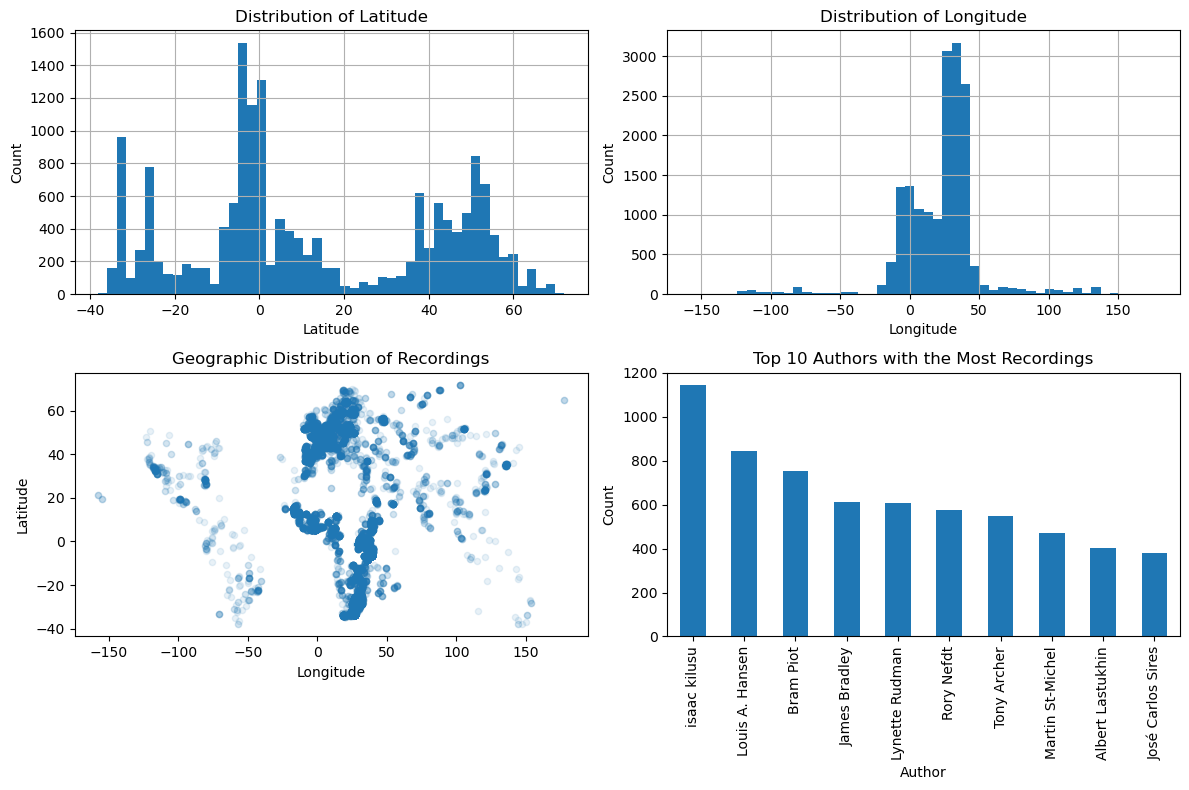

In [12]:
import matplotlib.pyplot as plt

file_path = '/kaggle/input/birdclef-2023/train_metadata.csv'
df = pd.read_csv(file_path)

# Set up a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot a histogram of the latitude values
df['latitude'].hist(bins=50, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Latitude')
axs[0, 0].set_xlabel('Latitude')
axs[0, 0].set_ylabel('Count')
# Plot a histogram of the longitude values
df['longitude'].hist(bins=50, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Longitude')
axs[0, 1].set_xlabel('Longitude')
axs[0, 1].set_ylabel('Count')

# Plot a scatterplot of the latitude and longitude values
df.plot.scatter(x='longitude', y='latitude', alpha=0.1, ax=axs[1, 0])
axs[1, 0].set_title('Geographic Distribution of Recordings')
axs[1, 0].set_xlabel('Longitude')
axs[1, 0].set_ylabel('Latitude')

# Print the top 10 authors with the most recordings
df['author'].value_counts().nlargest(10).plot.bar(ax=axs[1, 1])
axs[1, 1].set_title('Top 10 Authors with the Most Recordings')
axs[1, 1].set_xlabel('Author')
axs[1, 1].set_ylabel('Count')
# Adjust the layout of the subplots
plt.tight_layout()

# Print the number of recordings for each bird species
print(df['primary_label'].value_counts())

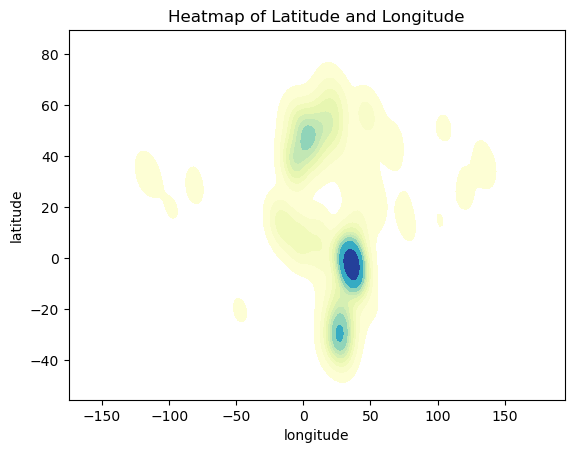

In [13]:
import seaborn as sns

sns.kdeplot(data=df, x='longitude', y='latitude', cmap="YlGnBu", fill=True)
plt.title('Heatmap of Latitude and Longitude')
plt.show()

In [14]:
import plotly.express as px

# Create the heatmap using Plotly Express
fig = px.density_heatmap(df, x='longitude', y='latitude', color_continuous_scale="YlGnBu")

# Set the title of the heatmap
fig.update_layout(title='Interactive Heatmap of Latitude and Longitude')

# Display the heatmap
fig.show()

In [15]:
taxonomy = pd.read_csv('/kaggle/input/birdclef-2023/eBird_Taxonomy_v2021.csv')
taxonomy

,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN
...,...,...,...,...,...,...,...,...,...
16748,34694,species,slcgro1,Slate-colored Grosbeak,Saltator grossus,Passeriformes,Thraupidae (Tanagers and Allies),NaN,NaN
16749,34697,species,bltgro2,Black-throated Grosbeak,Saltator fuliginosus,Passeriformes,Thraupidae (Tanagers and Allies),NaN,NaN
16750,34698,spuh,saltat1,saltator sp.,Saltator sp.,Passeriformes,Thraupidae (Tanagers and Allies),NaN,NaN
16751,34699,spuh,passer1,passerine sp.,Passeriformes sp.,Passeriformes,NaN,Others,NaN


# **Audio Processing**

**All comments welcome!**

## Table of Contents
- [Preparation](#Preparation)
- [Pick example](#Pick-example)
- [Wavefront](#Wavefront)
- [Spectogram](#Spectogram)
    - [Without centering](#Without-centering)
    - [With centering](#With-centering)
- [Recap: Discrete Fourier Transform](#Recap:-Discrete-Fourier-Transform)
    - [Real-valued DFT](#Real-valued-DFT)
    - [Frequency](#Frequency)
- [Amplitude to dB](#Amplitude-to-dB)
- [Mel spectogram](#Mel-spectogram)
    - [Mel basis](#Mel-basis)

**Preparation**

In [17]:
base_dir = "/kaggle/input/birdclef-2023/"
path_train = base_dir + "train_metadata.csv" 
train_sound_dir = "/kaggle/input/birdclef-2023/train_audio/"
sampling_rate = 32_000

In [18]:
train = pd.read_csv(path_train)
train["path_ogg"] = train_sound_dir + train["filename"]
train.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename,path_ogg
0,abethr1,[],['song'],4.3906,38.2788,Turdus tephronotus,African Bare-eyed Thrush,Rolf A. de By,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/128013,abethr1/XC128013.ogg,/kaggle/input/birdclef-2023/train_audio/abethr...
1,abethr1,[],['call'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363501,abethr1/XC363501.ogg,/kaggle/input/birdclef-2023/train_audio/abethr...
2,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363502,abethr1/XC363502.ogg,/kaggle/input/birdclef-2023/train_audio/abethr...
3,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/363503,abethr1/XC363503.ogg,/kaggle/input/birdclef-2023/train_audio/abethr...
4,abethr1,[],"['call', 'song']",-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/363504,abethr1/XC363504.ogg,/kaggle/input/birdclef-2023/train_audio/abethr...


# Pick an example
Let us pick a single example and analyze.

In [19]:
from IPython.display import Audio

In [20]:
# lets make it reproducible, otherwise use rec = train.sample(1).iloc[0]
rec = train.loc[11470]
path_ogg = rec["path_ogg"]
rec

primary_label                                                  reccor
secondary_labels                                                   []
type                                                         ['call']
latitude                                                      12.4595
longitude                                                    -16.7815
scientific_name                                  Uraeginthus bengalus
common_name                                    Red-cheeked Cordonbleu
author                                                      Bram Piot
license             Creative Commons Attribution-NonCommercial-Sha...
rating                                                            4.5
url                                 https://www.xeno-canto.org/359207
filename                                          reccor/XC359207.ogg
path_ogg            /kaggle/input/birdclef-2023/train_audio/reccor...
Name: 11470, dtype: object

In [21]:
librosa.get_samplerate(path_ogg)

32000

In [22]:
Audio(path_ogg, rate=sampling_rate)

In [23]:
sig, sr = librosa.load(path_ogg, sr=sampling_rate, duration=15)
sig, sr, len(sig) / sampling_rate

(array([-5.4594250e-07,  9.9943600e-07, -1.6194898e-06, ...,
         2.2374883e-03,  3.2046440e-03,  7.5819390e-04], dtype=float32),
 32000,
 15.0)

# Wavefront
- The librosa utility function seems to support higher resolution than the matplotlib one.

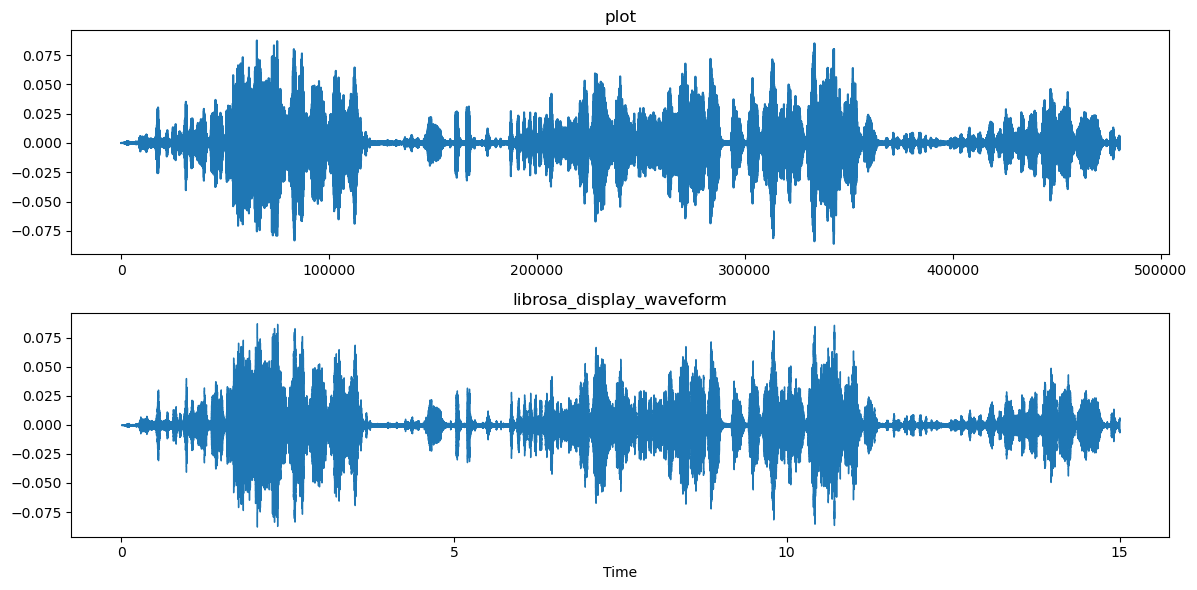

In [25]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 6))
ax0.plot(sig)
ax0.set_title("plot")
librosa.display.waveshow(sig, sr=sr, ax=ax1)
ax1.set_title("librosa_display_waveform")
plt.tight_layout()
plt.show()

# Spectogram
- Note, pick the same FFT and window function as used by librosa!
- Using the inital ``scipy.signal.windows.hann`` was always giving something slightly different (though filter looks very similar).
- Spectogram is an image of the Fourier transform different time frame of the signals. Those frames usually partially overlap.
- There is an additional filter in place to avoid border effects, so one computes the Discrete Fourier Transform (DFT) of ``window * frame``.

In [26]:
from librosa import get_fftlib
from librosa import util
from librosa.filters import get_window
from scipy.signal.windows import hann as _hann

In [27]:
fft = get_fftlib()
fft

<module 'numpy.fft' from '/opt/conda/lib/python3.7/site-packages/numpy/fft/__init__.py'>

In [28]:
n_fft = 2048
hop_length = int(n_fft // 4)
win_length = n_fft

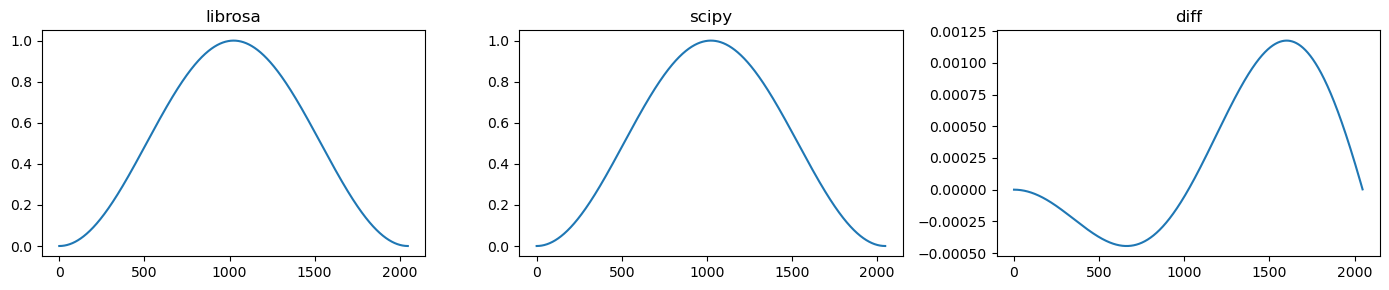

In [29]:
w = get_window("hann", Nx=win_length)
_w = _hann(win_length)
fig, axs = plt.subplots(ncols=3, figsize=(14, 3))
axs[0].plot(w)
axs[0].set_title("librosa")
axs[1].plot(_w)
axs[1].set_title("scipy")
axs[2].plot(w - _w)
axs[2].set_title("diff")
plt.tight_layout()
plt.show()

### Without centering
- This is an easier slicing of the individual frames on which the FFT is being computed.
- More precisely, the frames start with ``frame[0] = sig[0:n_fft], frame[1] = sig[hop_length:hop_length + n_fft], ...`` and don't pad beyond.

In [30]:
stop = None
spec = librosa.stft(sig[:stop], n_fft=n_fft, hop_length=hop_length, win_length=win_length, center=False)
print(spec.shape)

(1025, 934)


In [31]:
# manual size calculation
nrows = 1 + n_fft // 2
ncols = 1 + (len(sig[:stop]) - n_fft) // hop_length 
nrows, ncols

(1025, 934)

In [32]:
# frame check with [0, 1, ..., 9]
util.frame(np.arange(10), frame_length=3, hop_length=2)

array([[0, 2, 4, 6],
       [1, 3, 5, 7],
       [2, 4, 6, 8]])

In [33]:
# pick a column and compute manual
idx = 15
start = idx * hop_length
stop = start + n_fft
s0 = spec[:, idx]
s1 = fft.rfft(w * sig[start:stop]).astype(s0.dtype)
print("librosa:", (s0.shape, s0.dtype))
print("manual:", (s1.shape, s1.dtype))
print("allclose:", np.allclose(s0, s1))

librosa: ((1025,), dtype('complex64'))
manual: ((1025,), dtype('complex64'))
allclose: True


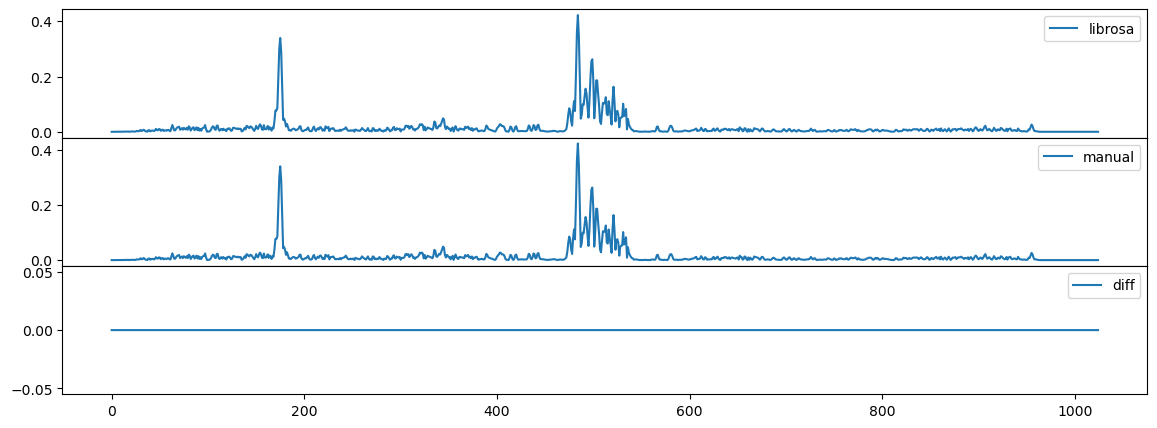

In [34]:
fig, axs = plt.subplots(nrows=3, figsize=(14, 5), sharex="col", gridspec_kw={"hspace": 0})
axs[0].plot(np.abs(s0), label="librosa")
axs[0].legend(loc="upper right")
axs[1].plot(np.abs(s1), label="manual")
axs[1].legend(loc="upper right")
axs[2].plot(np.abs(s0 - s1), label="diff")
axs[2].legend(loc="upper right")
plt.show()

### With centering
- Centering pads the signal with zeros beyond border so that column ``i`` is centered at ``i * hop_length``.

In [35]:
stop = None
spec = librosa.stft(sig[:stop], n_fft=n_fft, hop_length=hop_length, win_length=win_length, center=True)
print(spec.shape)

(1025, 938)


In [36]:
# manual size calculation
nrows = 1 + n_fft // 2
ncols = 1 + (len(sig[:stop]) - 1) // hop_length 
nrows, ncols

(1025, 938)

In [37]:
# pick a column and compute manual
idx = 1
mid = idx * hop_length
width = n_fft // 2
start = mid - width
stop = mid + width
pad = (max(0, -start), 0)
start = max(0, start)
tot_len = len(sig[start:stop]) + pad[0]
pad = pad[0], n_fft - tot_len
h = np.pad(sig[start:stop], pad_width=pad)
s0 = spec[:, idx]
s1 = fft.rfft(w * h).astype(s0.dtype)
print("start, stop, pad:", (start, stop, pad))
print("librosa:", (s0.shape, s0.dtype))
print("manual:", (s1.shape, s1.dtype))
print("allclose:", np.allclose(s0, s1))

start, stop, pad: (0, 1536, (512, 0))
librosa: ((1025,), dtype('complex64'))
manual: ((1025,), dtype('complex64'))
allclose: True


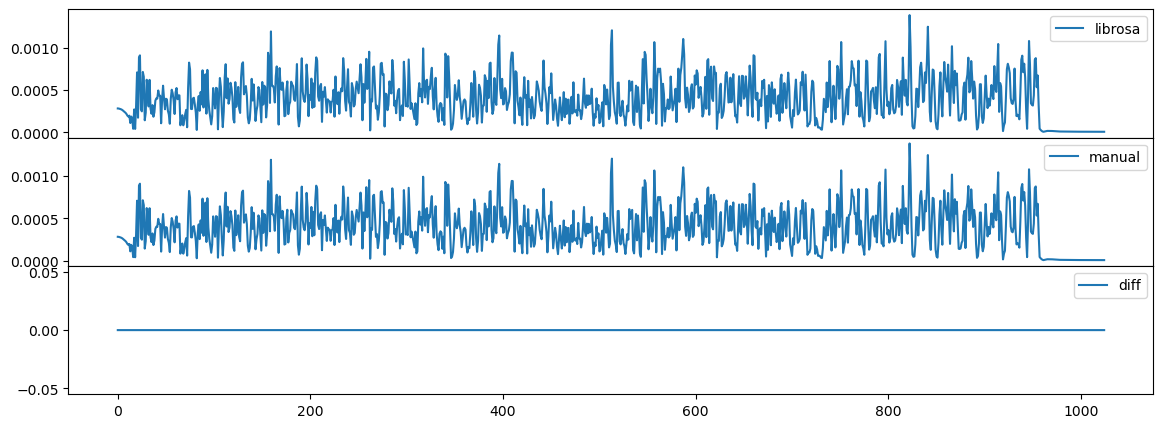

In [38]:
fig, axs = plt.subplots(nrows=3, figsize=(14, 5), sharex="col", gridspec_kw={"hspace": 0})
axs[0].plot(np.abs(s0), label="librosa")
axs[0].legend(loc="upper right")
axs[1].plot(np.abs(s1), label="manual")
axs[1].legend(loc="upper right")
axs[2].plot(np.abs(s0 - s1), label="diff")
axs[2].legend(loc="upper right")
plt.show()

# Recap: Discrete Fourier Transform
- Notation: A column vector is denoted as $\left| v\right>$, its complex conjugated row vector as $\left< v \right|$ and $\left<u \mid v\right>$ denotes the dot product. The vectors $\left| n \right>$ with $n=0, \dots, N-1$ are used to denote standard basis vectors, so any arbitrary signal is expressed as $\left| s \right> = \sum_{n=0}^{N-1} s_n \left| n \right>$ with $s_n$ being the coordinates.
- This precise Fourier transform used here is the Discrete Fourier Transform (DFT).
- In the DFT the signal $\left| s \right>$ is projected onto (or expanded in) the following basis: $\left|b_k\right> = \sum_n e^{i \frac{2 \pi}{N} kn }\left|n \right>$ with $k=0,\dots,N-1$.
- This is an un-normalized basis $\left< b_k \mid b_l \right> = N \delta_{kl}$.
- The DFT has values $x_k = \left< b_k \mid s\right> = \sum_n e^{-i \frac{2 \pi}{N} kn} s_n$ for all $k$.
- The $N$ factor is being used in the back trafo, i.e., $\left| s\right> = \frac{1}{N}\sum_k \left|b_k\right>\left< b_k \mid s\right> $.

### Real-valued DFT
- If the signal is real-valued, $s_n = s_n^*$ then we have $\left< b_k \mid s\right> = \left< b_{N-k} \mid s\right>^*$ or $x_k = x_{N-k}^*$.
- With this property the first set of coefficients uniquely determine all coefficients:
    - $x_0 = \sum_n s_n$
    - $x_k = \Re(x_k) + i \Im(x_k) = \frac{1}{2}(x_k + x_{N-k}) + i \frac{1}{2i}(x_k - x_{N-k}^*)$ with $k \leq \frac{N}{2}$.
- For even $N=2K$, this means for the coefficient $x_k$ that:
    - $x_0$ real
    - $x_k$ for $k=1, \dots, K-1$ complex
    - $x_K$ real
    - First $1 + K - 1 + 1 = 1 + K$ coefficients contain all $1 + 2 (K -1) + 1 = 2K = N$ real parameters in the original vector.
- For odd $N=2K + 1$, this means for the coefficient $x_k$ that:
    - $x_0$ real
    - $x_k$ for $k=1, \dots, K$ complex
    - First $1 + K$ coefficients contain all $1 + 2 K = N$ real parameters in the original vector.
    
### Frequency
- Basis vector $\left| b_k\right>$ with $k=0$ corresponds to the maximum period of $T=\infty$.
- Basis vector with $k=1$ corresponds to a period of $N$ steps or $T = \frac{N}{N_0}$ with $N_0$ being steps per second (sampling rate). This is central frequency unit then $f_1 = \frac{N_0}{N}$.
- More general, basis vector $k$ corresponds to $f_k = k f_1$.
- Note that this goes till $k \leq \frac{N}{2}$, then one switches to negative frequencies, turning clockwise if seeing the complex coefficients $\left< n \mid b_k\right> = e^{i \frac{2 \pi}{N} kn}$, see [Negative frequency](https://en.wikipedia.org/wiki/Negative_frequency).

In [39]:
N = 10
s = np.random.randn(N)
with np.printoptions(precision=3, suppress=True):
    display(fft.fft(s))
    display(fft.fftfreq(N))
    display(fft.rfft(s))
    display(fft.rfftfreq(N))

array([-6.688+0.j   , -1.304+0.252j,  4.168-2.255j, -1.329+1.239j,
        2.353-0.691j,  1.28 -0.j   ,  2.353+0.691j, -1.329-1.239j,
        4.168+2.255j, -1.304-0.252j])

array([ 0. ,  0.1,  0.2,  0.3,  0.4, -0.5, -0.4, -0.3, -0.2, -0.1])

array([-6.688+0.j   , -1.304+0.252j,  4.168-2.255j, -1.329+1.239j,
        2.353-0.691j,  1.28 +0.j   ])

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

In [ ]:
N = 11
s = np.random.randn(N)
with np.printoptions(precision=3, suppress=True):
    display(fft.fft(s))
    display(fft.fftfreq(N))
    display(fft.rfft(s))
    display(fft.rfftfreq(N))

# Amplitude to dB
- Spectrum gets squared and converted to log scale, $S \to 10 \left( \log_{10}{|S|^2} - \log_{10}{S_{ref}^2}\right)$
- $S_{ref}$ is a reference value and below it is computed as the maximal value on full spectrum.
- Note, this also has an effect on the relative top dB value.

In [ ]:
spec = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length, win_length=win_length, center=False)
spec_db = librosa.amplitude_to_db(np.abs(spec), ref=np.max)
spec.shape, spec_db.shape

In [ ]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(
    spec_db, sr=sampling_rate, x_axis="time", y_axis="hz", cmap=plt.get_cmap("viridis")
)
plt.tight_layout()
plt.show()

In [ ]:
# pick a column and compute manual
idx = 30
v0 = spec_db[:, idx]
ref = np.max(np.abs(spec))
v1 = np.abs(spec[:, idx])
v1 = np.maximum(10 * np.log10(v1**2) - 10 * np.log10(ref**2), -80)
print("librosa:", (v0.shape, v0.dtype))
print("ref value:", ref)
print("manual:", (v1.shape, v1.dtype))
print("allclose:", np.allclose(v0, v1))

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(14, 5), sharex="col", gridspec_kw={"hspace": 0})
axs[0].plot(v0, label="librosa")
axs[0].legend(loc="upper right")
axs[1].plot(v1, label="manual")
axs[1].legend(loc="upper right")
axs[2].plot(np.abs(v0 - v1), label="diff")
axs[2].legend(loc="upper right")
plt.show()

# Mel spectogram
- Similar built as spectogram but with other frequency scaling.
- This mel scale is a **perceptual scale** of pitches, see [Mel scale](https://en.wikipedia.org/wiki/Mel_scale).
    - Based how we perceive a tone.
    - _A double a high perceived tone should have a double as high value_. This is not the case on the frequency scale. 
- Implemented as basis change on Fourier transform, i.e., columns of the spectogram.
- Parameters ``n_fft, hop_length`` have the same meaning as before.
- Only frequency output is transformed to given number of mels and min/max frequency range.

In [ ]:
from librosa.filters import mel

In [ ]:
spec_height = 128
spec_width = 256
seconds = 5
power = 2
n_fft = 1024
fmin = 500
fmax = 12_500

In [ ]:
n_mels = spec_height
hop_length = (seconds * sampling_rate - n_fft) // (spec_width - 1) 
print("hop_length:", hop_length)
print("manual width:", 1 + (seconds * sampling_rate - n_fft) // hop_length)
print("spec_height, spec_width:", (spec_height, spec_width))

In [ ]:
start = 0
stop = start + seconds * sampling_rate
mel_spec = librosa.feature.melspectrogram(
    y=sig[start:stop], 
    hop_length=hop_length,
    sr=sampling_rate, 
    n_fft=n_fft, 
    n_mels=n_mels,
    center=False,
    fmin=fmin,
    fmax=fmax,
    power=power,
)
mel_spec.shape

### Mel basis

In [ ]:
mel_basis = mel(sr=sampling_rate, n_fft=n_fft, n_mels=n_mels, fmin=fmin, fmax=fmax)
mel_basis.shape

In [ ]:
# compute frequency bounds
freqs = fft.rfftfreq(n_fft, 1 / sampling_rate)
idxmin = np.where(fmin <= freqs)[0].min()
idxmax = np.where(freqs <= fmax)[0].max()
print(f"min valid freq: {freqs[idxmin]} at {idxmin}")
print(f"max valid freq: {freqs[idxmax]} at {idxmax}")

In [ ]:
S = librosa.stft(y=sig[start:stop], n_fft=n_fft, hop_length=hop_length, center=False)
S = np.abs(S)**power
S.shape

In [ ]:
# manual size calculation
nrows = 1 + n_fft // 2
ncols = 1 + (len(sig[start:stop]) - n_fft) // hop_length 
nrows, ncols

In [ ]:
# manual basis transform
mal_spec_manual = mel_basis @ S
print("allclose:", np.allclose(mel_spec, mal_spec_manual))

In [ ]:
plt.matshow(mel_basis)
plt.axvline(x=idxmin)
plt.axvline(x=idxmax)
plt.xlabel("freq index")
plt.ylabel("mel index")
plt.title("mel basis transform")
plt.show()

In [ ]:
plt.matshow(mel_basis @ mel_basis.transpose())
plt.show()

In [ ]:
# to dB
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
mel_spec_db.shape

In [ ]:
librosa.display.specshow(
    mel_spec_db, 
    sr=sampling_rate, 
    hop_length=hop_length, 
    x_axis='time', 
    y_axis='mel',
    fmin=fmin, 
    fmax=fmax,
    cmap=plt.get_cmap('viridis')
)
plt.show()

# **Work in progress....**

**references**:
*BC23 - Audio Processing - First Steps* https://www.kaggle.com/code/morodertobias/bc23-audio-processing-first-steps
